In [1]:
# This notebook aims to Apply KNN to the Weather Station Data and take the average of those clusters to 
# fill in the missing values from the weather station data

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv("Data/weather_station_data_updated.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453138 entries, 0 to 453137
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tavg       342866 non-null  float64
 1   tmin       354263 non-null  float64
 2   tmax       354009 non-null  float64
 3   prcp       283351 non-null  float64
 4   wspd       295828 non-null  float64
 5   pres       202943 non-null  float64
 6   tsun       2229 non-null    float64
 7   latitude   453138 non-null  float64
 8   longitude  453138 non-null  float64
 9   elevation  453138 non-null  float64
 10  state      453103 non-null  object 
 11  time       453138 non-null  object 
dtypes: float64(10), object(2)
memory usage: 41.5+ MB



N = 1
Standard deviation of predictions for each column:
tavg: 10.9433
tmin: 10.7552
tmax: 11.5248
prcp: 69.5919
wspd: 3.9400
elevation: 491.6962
Mean standard deviation across columns: 99.7419
Standard deviation of standard deviations: 176.6830

N = 2
Standard deviation of predictions for each column:
tavg: 9.1573
tmin: 9.1348
tmax: 9.5805
prcp: 53.7102
wspd: 3.6452
elevation: 491.6962
Mean standard deviation across columns: 96.1540
Standard deviation of standard deviations: 177.6930

N = 3
Standard deviation of predictions for each column:
tavg: 7.7753
tmin: 7.8384
tmax: 8.1146
prcp: 48.7792
wspd: 3.5187
elevation: 491.6962
Mean standard deviation across columns: 94.6204
Standard deviation of standard deviations: 178.2445

N = 4
Standard deviation of predictions for each column:
tavg: 6.7333
tmin: 6.8750
tmax: 7.0142
prcp: 47.6096
wspd: 3.4495
elevation: 491.6962
Mean standard deviation across columns: 93.8963
Standard deviation of standard deviations: 178.5527

N = 5
Standard devia

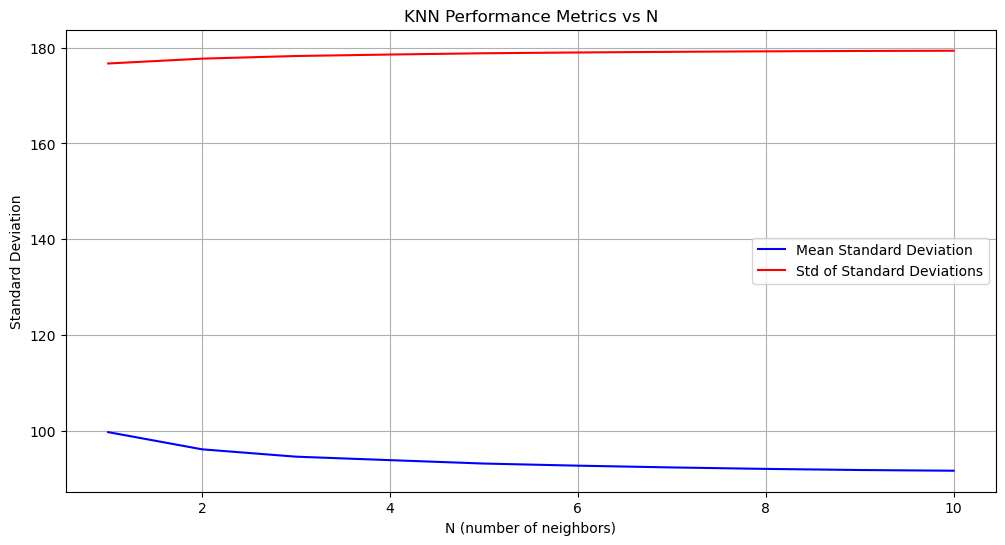

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

# Create a copy of the original DataFrame
data_copy = data.copy()

# Columns to use as features
feature_columns = ['latitude', 'longitude']

# Columns to analyze
columns_to_analyze = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'elevation']

# Drop rows with NaNs in any of the analyzed columns for fitting purposes
non_missing_data = data_copy.dropna(subset=columns_to_analyze + feature_columns)

# Separate features
X_non_missing = non_missing_data[feature_columns]

# Dictionary to store results for each N
results = {}

# Number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Iterate over N from 1 to 10
for N in range(1, 11):
    # Dictionary to store standard deviations for each column
    column_std_devs = {col: [] for col in columns_to_analyze}
    
    for column in columns_to_analyze:
        y_non_missing = non_missing_data[column]
        
        # Skip columns with all NaN values
        if y_non_missing.isna().all():
            continue
            
        # Perform k-fold cross-validation
        fold_std_devs = []
        for train_idx, val_idx in kf.split(X_non_missing):
            X_train, X_val = X_non_missing.iloc[train_idx], X_non_missing.iloc[val_idx]
            y_train, y_val = y_non_missing.iloc[train_idx], y_non_missing.iloc[val_idx]
            
            # Train the KNN model
            knn_model = KNeighborsRegressor(n_neighbors=N, weights='distance')
            knn_model.fit(X_train, y_train)
            
            # Make predictions on validation set
            predictions = knn_model.predict(X_val)
            
            # Calculate standard deviation of predictions for this fold
            fold_std_devs.append(np.std(predictions))
        
        # Store average standard deviation across folds for this column
        column_std_devs[column] = np.mean(fold_std_devs)
    
    # Calculate metrics for this N value
    std_dev_values = list(column_std_devs.values())
    mean_std_dev = np.mean(std_dev_values)
    std_of_std_devs = np.std(std_dev_values)
    
    # Store results
    results[N] = {
        'column_std_devs': column_std_devs,
        'mean_std_dev': mean_std_dev,
        'std_of_std_devs': std_of_std_devs
    }
    
    # Print results for current iteration
    print(f"\nN = {N}")
    print("Standard deviation of predictions for each column:")
    for col, std_dev in column_std_devs.items():
        print(f"{col}: {std_dev:.4f}")
    print(f"Mean standard deviation across columns: {mean_std_dev:.4f}")
    print(f"Standard deviation of standard deviations: {std_of_std_devs:.4f}")

# Find optimal N based on different criteria
min_mean_std_N = min(results.keys(), key=lambda n: results[n]['mean_std_dev'])
min_std_of_std_N = min(results.keys(), key=lambda n: results[n]['std_of_std_devs'])

print("\nSummary:")
print(f"N with lowest mean standard deviation: {min_mean_std_N}")
print(f"N with most consistent standard deviations: {min_std_of_std_N}")

# Create visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
n_values = list(results.keys())
mean_stds = [results[n]['mean_std_dev'] for n in n_values]
std_of_stds = [results[n]['std_of_std_devs'] for n in n_values]

plt.plot(n_values, mean_stds, 'b-', label='Mean Standard Deviation')
plt.plot(n_values, std_of_stds, 'r-', label='Std of Standard Deviations')
plt.xlabel('N (number of neighbors)')
plt.ylabel('Standard Deviation')
plt.title('KNN Performance Metrics vs N')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453138 entries, 0 to 453137
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tavg       342866 non-null  float64
 1   tmin       354263 non-null  float64
 2   tmax       354009 non-null  float64
 3   prcp       283351 non-null  float64
 4   wspd       295828 non-null  float64
 5   pres       453138 non-null  float64
 6   tsun       2229 non-null    float64
 7   latitude   453138 non-null  float64
 8   longitude  453138 non-null  float64
 9   elevation  453138 non-null  float64
 10  state      453103 non-null  object 
 11  time       453138 non-null  object 
dtypes: float64(10), object(2)
memory usage: 41.5+ MB


In [19]:
data_imputed.to_csv('ws_4n.csv', index = False)


Analyzing N = 1

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Results for N = 1

Regular Statistics:

tavg:
  Mean Std: 0.0000
  Std of Std: 0.0000

tmin:
  Mean Std: 0.0000
  Std of Std: 0.0000

tmax:
  Mean Std: 0.0000
  Std of Std: 0.0000

prcp:
  Mean Std: 0.0000
  Std of Std: 0.0000

wspd:
  Mean Std: 0.0000
  Std of Std: 0.0000

elevation:
  Mean Std: 0.0000
  Std of Std: 0.0000

Distance-Weighted Statistics:

tavg:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

tmin:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

tmax:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

prcp:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

wspd:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

elevation:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

Overall Statistics:
Overall Mean Std: 0.0000
Overall Std of Std: 0.0000
Ov

<Figure size 1500x1000 with 0 Axes>

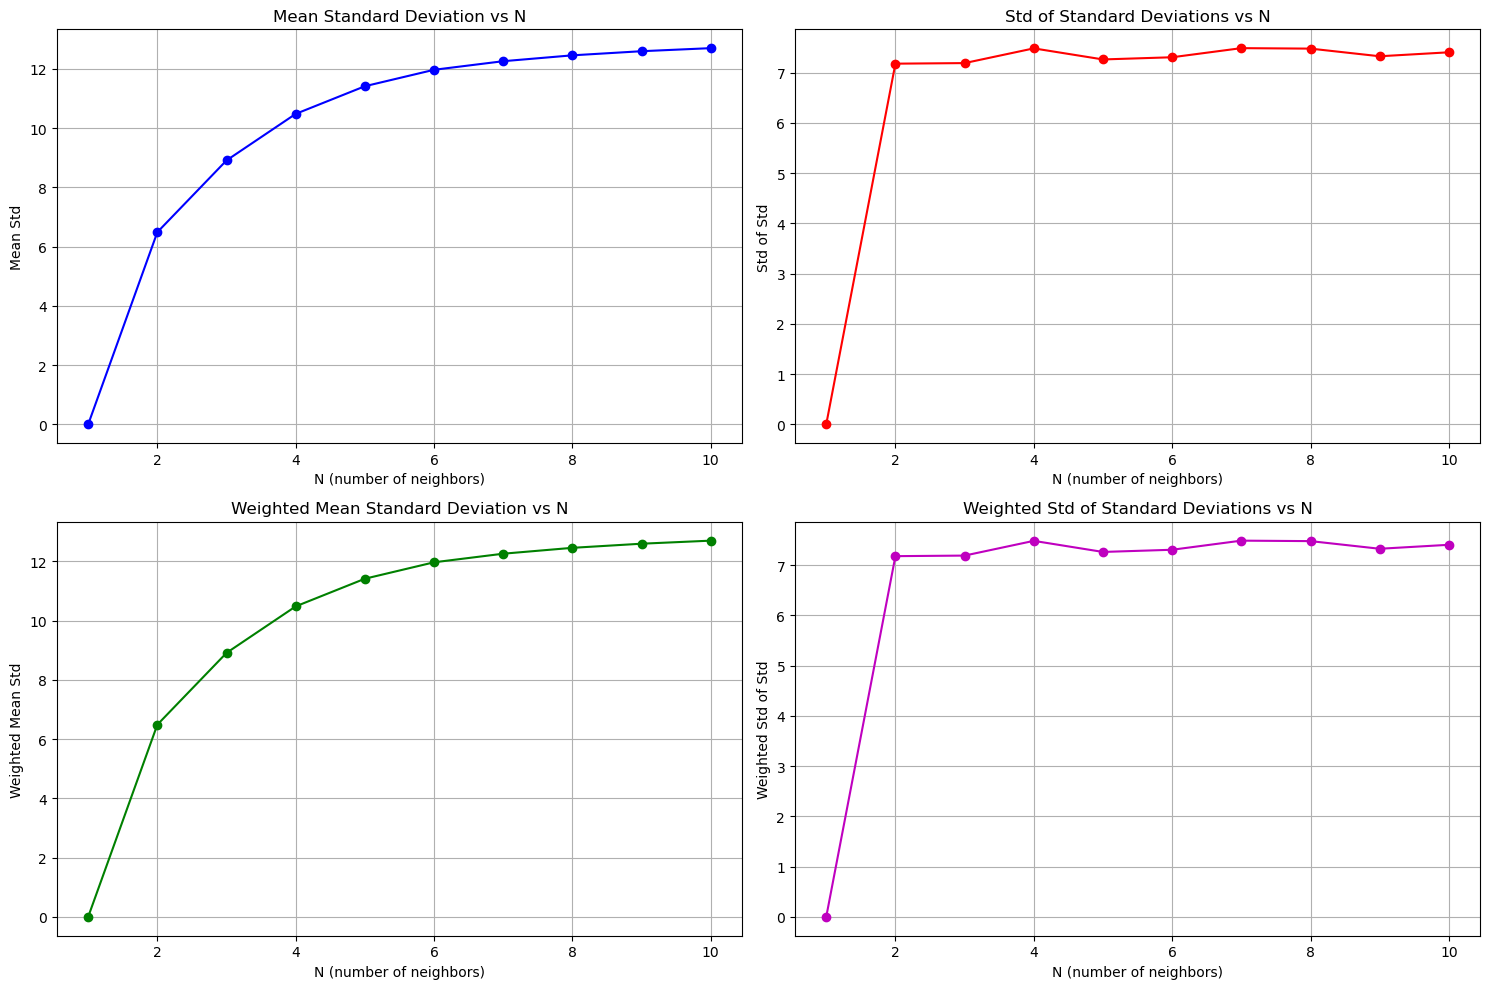


Optimal N values:
Lowest mean standard deviation: N = 1
Most consistent standard deviations: N = 1
Lowest weighted mean standard deviation: N = 1
Most consistent weighted standard deviations: N = 1


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from scipy.spatial.distance import euclidean

class CustomKNNRegressor(KNeighborsRegressor):
    def get_neighbor_values(self, X):
        """Get the target values of neighbors for each prediction point"""
        dist, indices = self.kneighbors(X)
        return self._y[indices], dist

# Create a copy of the original DataFrame
data_copy = data.copy()

# Columns to use as features
feature_columns = ['latitude', 'longitude']

# Columns to analyze
columns_to_analyze = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'elevation']

# Drop rows with NaNs in any of the analyzed columns for fitting purposes
non_missing_data = data_copy.dropna(subset=columns_to_analyze + feature_columns)

# Separate features
X_non_missing = non_missing_data[feature_columns]

# Dictionary to store results for each N
results = {}

# Number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Function to calculate distance-weighted standard deviation
def weighted_std(values, distances):
    weights = 1 / (distances + 1e-6)  # Add small epsilon to avoid division by zero
    weights = weights / np.sum(weights)
    weighted_mean = np.sum(values * weights)
    weighted_var = np.sum(weights * (values - weighted_mean) ** 2)
    return np.sqrt(weighted_var)

# Iterate over N from 1 to 10
for N in range(1, 11):
    print(f"\nAnalyzing N = {N}")
    
    # Dictionary to store metrics for each column
    column_metrics = {col: {
        'neighbor_stds': [],
        'weighted_neighbor_stds': []
    } for col in columns_to_analyze}
    
    for column in columns_to_analyze:
        print(f"\nProcessing column: {column}")
        y_non_missing = non_missing_data[column]
        
        # Skip columns with all NaN values
        if y_non_missing.isna().all():
            continue
            
        # Perform k-fold cross-validation
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_non_missing)):
            X_train, X_val = X_non_missing.iloc[train_idx], X_non_missing.iloc[val_idx]
            y_train, y_val = y_non_missing.iloc[train_idx], y_non_missing.iloc[val_idx]
            
            # Train the custom KNN model
            knn_model = CustomKNNRegressor(n_neighbors=N, weights='distance')
            knn_model.fit(X_train, y_train)
            
            # Get neighbor values and distances for each prediction point
            neighbor_values, distances = knn_model.get_neighbor_values(X_val)
            
            # Calculate standard deviation of neighbors for each prediction point
            point_stds = np.std(neighbor_values, axis=1)
            weighted_point_stds = np.array([
                weighted_std(values, dists) 
                for values, dists in zip(neighbor_values, distances)
            ])
            
            # Store the results
            column_metrics[column]['neighbor_stds'].extend(point_stds)
            column_metrics[column]['weighted_neighbor_stds'].extend(weighted_point_stds)
    
    # Calculate summary statistics for this N value
    summary_stats = {
        'mean_std': {},
        'std_of_std': {},
        'weighted_mean_std': {},
        'weighted_std_of_std': {}
    }
    
    for column in columns_to_analyze:
        if column_metrics[column]['neighbor_stds']:
            # Regular statistics
            neighbor_stds = np.array(column_metrics[column]['neighbor_stds'])
            summary_stats['mean_std'][column] = np.mean(neighbor_stds)
            summary_stats['std_of_std'][column] = np.std(neighbor_stds)
            
            # Distance-weighted statistics
            weighted_stds = np.array(column_metrics[column]['weighted_neighbor_stds'])
            summary_stats['weighted_mean_std'][column] = np.mean(weighted_stds)
            summary_stats['weighted_std_of_std'][column] = np.std(weighted_stds)
    
    # Store results for this N value
    results[N] = {
        'summary_stats': summary_stats,
        'overall_mean_std': np.mean([v for v in summary_stats['mean_std'].values()]),
        'overall_std_of_std': np.mean([v for v in summary_stats['std_of_std'].values()]),
        'overall_weighted_mean_std': np.mean([v for v in summary_stats['weighted_mean_std'].values()]),
        'overall_weighted_std_of_std': np.mean([v for v in summary_stats['weighted_std_of_std'].values()])
    }
    
    # Print detailed results for current iteration
    print(f"\nResults for N = {N}")
    print("\nRegular Statistics:")
    for column in columns_to_analyze:
        if column in summary_stats['mean_std']:
            print(f"\n{column}:")
            print(f"  Mean Std: {summary_stats['mean_std'][column]:.4f}")
            print(f"  Std of Std: {summary_stats['std_of_std'][column]:.4f}")
    
    print("\nDistance-Weighted Statistics:")
    for column in columns_to_analyze:
        if column in summary_stats['weighted_mean_std']:
            print(f"\n{column}:")
            print(f"  Weighted Mean Std: {summary_stats['weighted_mean_std'][column]:.4f}")
            print(f"  Weighted Std of Std: {summary_stats['weighted_std_of_std'][column]:.4f}")
    
    print("\nOverall Statistics:")
    print(f"Overall Mean Std: {results[N]['overall_mean_std']:.4f}")
    print(f"Overall Std of Std: {results[N]['overall_std_of_std']:.4f}")
    print(f"Overall Weighted Mean Std: {results[N]['overall_weighted_mean_std']:.4f}")
    print(f"Overall Weighted Std of Std: {results[N]['overall_weighted_std_of_std']:.4f}")

# Create visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot data
n_values = list(results.keys())
mean_stds = [results[n]['overall_mean_std'] for n in n_values]
std_of_stds = [results[n]['overall_std_of_std'] for n in n_values]
weighted_mean_stds = [results[n]['overall_weighted_mean_std'] for n in n_values]
weighted_std_of_stds = [results[n]['overall_weighted_std_of_std'] for n in n_values]

# Regular Mean Standard Deviation
ax1.plot(n_values, mean_stds, 'b-o')
ax1.set_title('Mean Standard Deviation vs N')
ax1.set_xlabel('N (number of neighbors)')
ax1.set_ylabel('Mean Std')
ax1.grid(True)

# Regular Std of Standard Deviation
ax2.plot(n_values, std_of_stds, 'r-o')
ax2.set_title('Std of Standard Deviations vs N')
ax2.set_xlabel('N (number of neighbors)')
ax2.set_ylabel('Std of Std')
ax2.grid(True)

# Weighted Mean Standard Deviation
ax3.plot(n_values, weighted_mean_stds, 'g-o')
ax3.set_title('Weighted Mean Standard Deviation vs N')
ax3.set_xlabel('N (number of neighbors)')
ax3.set_ylabel('Weighted Mean Std')
ax3.grid(True)

# Weighted Std of Standard Deviation
ax4.plot(n_values, weighted_std_of_stds, 'm-o')
ax4.set_title('Weighted Std of Standard Deviations vs N')
ax4.set_xlabel('N (number of neighbors)')
ax4.set_ylabel('Weighted Std of Std')
ax4.grid(True)

plt.tight_layout()
plt.show()

# Find optimal N values based on different criteria
best_N = {
    'min_mean_std': min(results.keys(), key=lambda n: results[n]['overall_mean_std']),
    'min_std_of_std': min(results.keys(), key=lambda n: results[n]['overall_std_of_std']),
    'min_weighted_mean_std': min(results.keys(), key=lambda n: results[n]['overall_weighted_mean_std']),
    'min_weighted_std_of_std': min(results.keys(), key=lambda n: results[n]['overall_weighted_std_of_std'])
}

print("\nOptimal N values:")
print(f"Lowest mean standard deviation: N = {best_N['min_mean_std']}")
print(f"Most consistent standard deviations: N = {best_N['min_std_of_std']}")
print(f"Lowest weighted mean standard deviation: N = {best_N['min_weighted_mean_std']}")
print(f"Most consistent weighted standard deviations: N = {best_N['min_weighted_std_of_std']}")


Analyzing N = 1

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Detailed Monthly Results for N = 1

Month 1:

Regular Statistics:

tavg:
  Mean Std: 0.0000
  Std of Std: 0.0000

tmin:
  Mean Std: 0.0000
  Std of Std: 0.0000

tmax:
  Mean Std: 0.0000
  Std of Std: 0.0000

prcp:
  Mean Std: 0.0000
  Std of Std: 0.0000

wspd:
  Mean Std: 0.0000
  Std of Std: 0.0000

elevation:
  Mean Std: 0.0000
  Std of Std: 0.0000

Distance-Weighted Statistics:

tavg:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

tmin:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

tmax:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

prcp:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

wspd:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

elevation:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

Month 2:

Regular Statistics:

tavg:
  Mean Std

<Figure size 2000x1500 with 0 Axes>

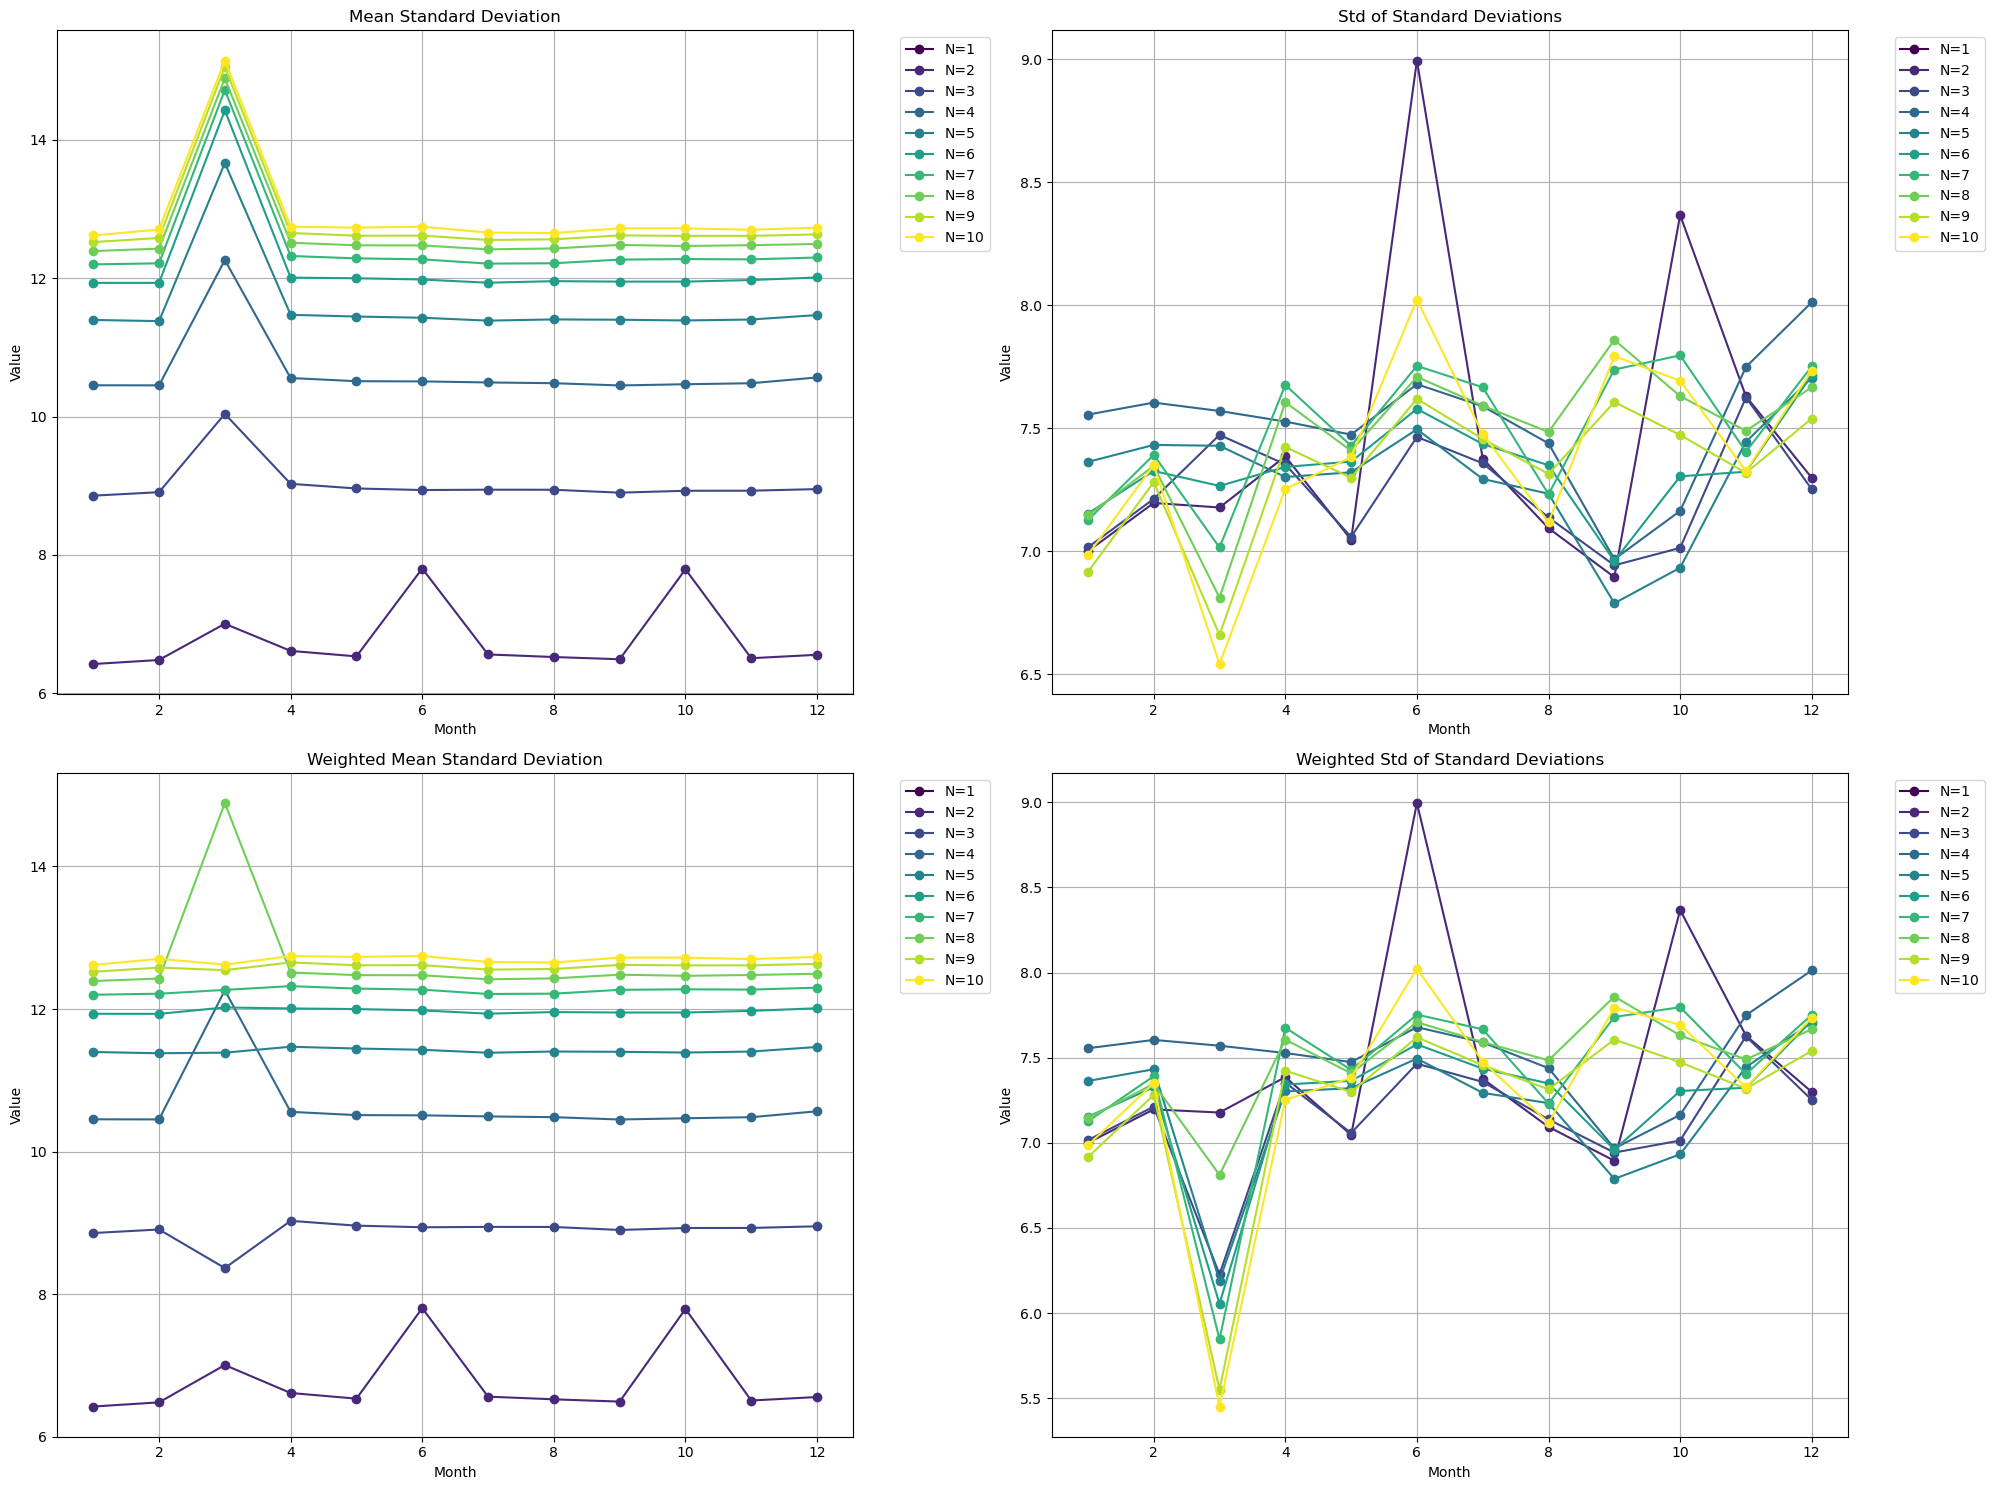


Optimal N values by month:

Month 1:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 2:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 3:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 4:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 5:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 6:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 7:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 8:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 9:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 10:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1

Month 11:


In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from scipy.spatial.distance import euclidean
import datetime

class CustomKNNRegressor(KNeighborsRegressor):
    def get_neighbor_values(self, X):
        """Get the target values of neighbors for each prediction point"""
        dist, indices = self.kneighbors(X)
        return self._y[indices], dist

# Create a copy of the original DataFrame
data_copy = data.copy()

# Convert time column to datetime if it's not already
data_copy['time'] = pd.to_datetime(data_copy['time'])
data_copy['month'] = data_copy['time'].dt.month

# Columns to use as features
feature_columns = ['latitude', 'longitude']

# Columns to analyze
columns_to_analyze = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'elevation']

# Drop rows with NaNs in any of the analyzed columns for fitting purposes
non_missing_data = data_copy.dropna(subset=columns_to_analyze + feature_columns)

# Separate features
X_non_missing = non_missing_data[feature_columns]

# Dictionary to store results for each N
results = {}

# Number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Function to calculate distance-weighted standard deviation
def weighted_std(values, distances):
    weights = 1 / (distances + 1e-6)
    weights = weights / np.sum(weights)
    weighted_mean = np.sum(values * weights)
    weighted_var = np.sum(weights * (values - weighted_mean) ** 2)
    return np.sqrt(weighted_var)

# Iterate over N from 1 to 10
for N in range(1, 11):
    print(f"\nAnalyzing N = {N}")
    
    # Dictionary to store metrics for each column and month
    monthly_metrics = {
        month: {
            col: {
                'neighbor_stds': [],
                'weighted_neighbor_stds': []
            } for col in columns_to_analyze
        } for month in range(1, 13)
    }
    
    for column in columns_to_analyze:
        print(f"\nProcessing column: {column}")
        y_non_missing = non_missing_data[column]
        
        # Skip columns with all NaN values
        if y_non_missing.isna().all():
            continue
            
        # Perform k-fold cross-validation
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_non_missing)):
            X_train, X_val = X_non_missing.iloc[train_idx], X_non_missing.iloc[val_idx]
            y_train, y_val = y_non_missing.iloc[train_idx], y_non_missing.iloc[val_idx]
            
            # Get months for validation set
            val_months = non_missing_data['month'].iloc[val_idx]
            
            # Train the custom KNN model
            knn_model = CustomKNNRegressor(n_neighbors=N, weights='distance')
            knn_model.fit(X_train, y_train)
            
            # Get neighbor values and distances for each prediction point
            neighbor_values, distances = knn_model.get_neighbor_values(X_val)
            
            # Calculate standard deviation of neighbors for each prediction point
            point_stds = np.std(neighbor_values, axis=1)
            weighted_point_stds = np.array([
                weighted_std(values, dists) 
                for values, dists in zip(neighbor_values, distances)
            ])
            
            # Store results by month
            for month in range(1, 13):
                month_mask = val_months == month
                if np.any(month_mask):
                    monthly_metrics[month][column]['neighbor_stds'].extend(point_stds[month_mask])
                    monthly_metrics[month][column]['weighted_neighbor_stds'].extend(weighted_point_stds[month_mask])
    
    # Calculate monthly summary statistics
    monthly_summary = {}
    overall_stats = {
        'mean_std': [],
        'std_of_std': [],
        'weighted_mean_std': [],
        'weighted_std_of_std': []
    }
    
    for month in range(1, 13):
        monthly_summary[month] = {
            'mean_std': {},
            'std_of_std': {},
            'weighted_mean_std': {},
            'weighted_std_of_std': {}
        }
        
        for column in columns_to_analyze:
            if monthly_metrics[month][column]['neighbor_stds']:
                # Regular statistics
                neighbor_stds = np.array(monthly_metrics[month][column]['neighbor_stds'])
                monthly_summary[month]['mean_std'][column] = np.mean(neighbor_stds)
                monthly_summary[month]['std_of_std'][column] = np.std(neighbor_stds)
                
                # Distance-weighted statistics
                weighted_stds = np.array(monthly_metrics[month][column]['weighted_neighbor_stds'])
                monthly_summary[month]['weighted_mean_std'][column] = np.mean(weighted_stds)
                monthly_summary[month]['weighted_std_of_std'][column] = np.std(weighted_stds)
        
        # Calculate overall monthly statistics
        if monthly_summary[month]['mean_std']:
            overall_stats['mean_std'].append(np.mean(list(monthly_summary[month]['mean_std'].values())))
            overall_stats['std_of_std'].append(np.mean(list(monthly_summary[month]['std_of_std'].values())))
            overall_stats['weighted_mean_std'].append(np.mean(list(monthly_summary[month]['weighted_mean_std'].values())))
            overall_stats['weighted_std_of_std'].append(np.mean(list(monthly_summary[month]['weighted_std_of_std'].values())))
    
    # Store results for this N value
    results[N] = {
        'monthly_summary': monthly_summary,
        'overall_mean_std': np.mean(overall_stats['mean_std']),
        'overall_std_of_std': np.mean(overall_stats['std_of_std']),
        'overall_weighted_mean_std': np.mean(overall_stats['weighted_mean_std']),
        'overall_weighted_std_of_std': np.mean(overall_stats['weighted_std_of_std'])
    }
    
    # Print monthly results
    print(f"\nDetailed Monthly Results for N = {N}")
    for month in range(1, 13):
        print(f"\nMonth {month}:")
        if monthly_summary[month]['mean_std']:
            print("\nRegular Statistics:")
            for column in columns_to_analyze:
                if column in monthly_summary[month]['mean_std']:
                    print(f"\n{column}:")
                    print(f"  Mean Std: {monthly_summary[month]['mean_std'][column]:.4f}")
                    print(f"  Std of Std: {monthly_summary[month]['std_of_std'][column]:.4f}")
            
            print("\nDistance-Weighted Statistics:")
            for column in columns_to_analyze:
                if column in monthly_summary[month]['weighted_mean_std']:
                    print(f"\n{column}:")
                    print(f"  Weighted Mean Std: {monthly_summary[month]['weighted_mean_std'][column]:.4f}")
                    print(f"  Weighted Std of Std: {monthly_summary[month]['weighted_std_of_std'][column]:.4f}")

# Create visualizations
import matplotlib.pyplot as plt

# Create monthly trend visualization
plt.figure(figsize=(20, 15))

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
metrics = ['mean_std', 'std_of_std', 'weighted_mean_std', 'weighted_std_of_std']
titles = ['Mean Standard Deviation', 'Std of Standard Deviations', 
          'Weighted Mean Standard Deviation', 'Weighted Std of Standard Deviations']
colors = plt.cm.viridis(np.linspace(0, 1, 10))

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    for N in range(1, 11):
        monthly_values = []
        for month in range(1, 13):
            if metric in ['mean_std', 'std_of_std']:
                values = [v for v in results[N]['monthly_summary'][month][metric].values() if v]
            else:
                values = [v for v in results[N]['monthly_summary'][month][metric].values() if v]
            monthly_values.append(np.mean(values) if values else np.nan)
        
        ax.plot(range(1, 13), monthly_values, 'o-', label=f'N={N}', color=colors[N-1])
    
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Find optimal N values for each month
monthly_optimal_N = {month: {} for month in range(1, 13)}
metrics = ['mean_std', 'std_of_std', 'weighted_mean_std', 'weighted_std_of_std']

for month in range(1, 13):
    for metric in metrics:
        valid_N = []
        metric_values = []
        
        for N in results.keys():
            if metric in results[N]['monthly_summary'][month] and results[N]['monthly_summary'][month][metric]:
                valid_N.append(N)
                metric_values.append(np.mean(list(results[N]['monthly_summary'][month][metric].values())))
        
        if valid_N:
            monthly_optimal_N[month][metric] = valid_N[np.argmin(metric_values)]

print("\nOptimal N values by month:")
for month in range(1, 13):
    print(f"\nMonth {month}:")
    for metric in metrics:
        if metric in monthly_optimal_N[month]:
            print(f"{metric}: N = {monthly_optimal_N[month][metric]}")


Analyzing N = 1

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Detailed Monthly Results for N = 1

Month 1:

Regular Statistics:

tavg:
  Mean Std: 0.0000
  Std of Std: 0.0000
  RMSE: 22.3937

tmin:
  Mean Std: 0.0000
  Std of Std: 0.0000
  RMSE: 21.4865

tmax:
  Mean Std: 0.0000
  Std of Std: 0.0000
  RMSE: 23.7573

prcp:
  Mean Std: 0.0000
  Std of Std: 0.0000
  RMSE: 77.9761

wspd:
  Mean Std: 0.0000
  Std of Std: 0.0000
  RMSE: 3.0933

elevation:
  Mean Std: 0.0000
  Std of Std: 0.0000
  RMSE: 0.5789

Distance-Weighted Statistics:

tavg:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

tmin:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

tmax:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

prcp:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

wspd:
  Weighted Mean Std: 0.0000
  Weighted Std of Std: 0.0000

elevation:
  Weighted M

<Figure size 2000x2000 with 0 Axes>

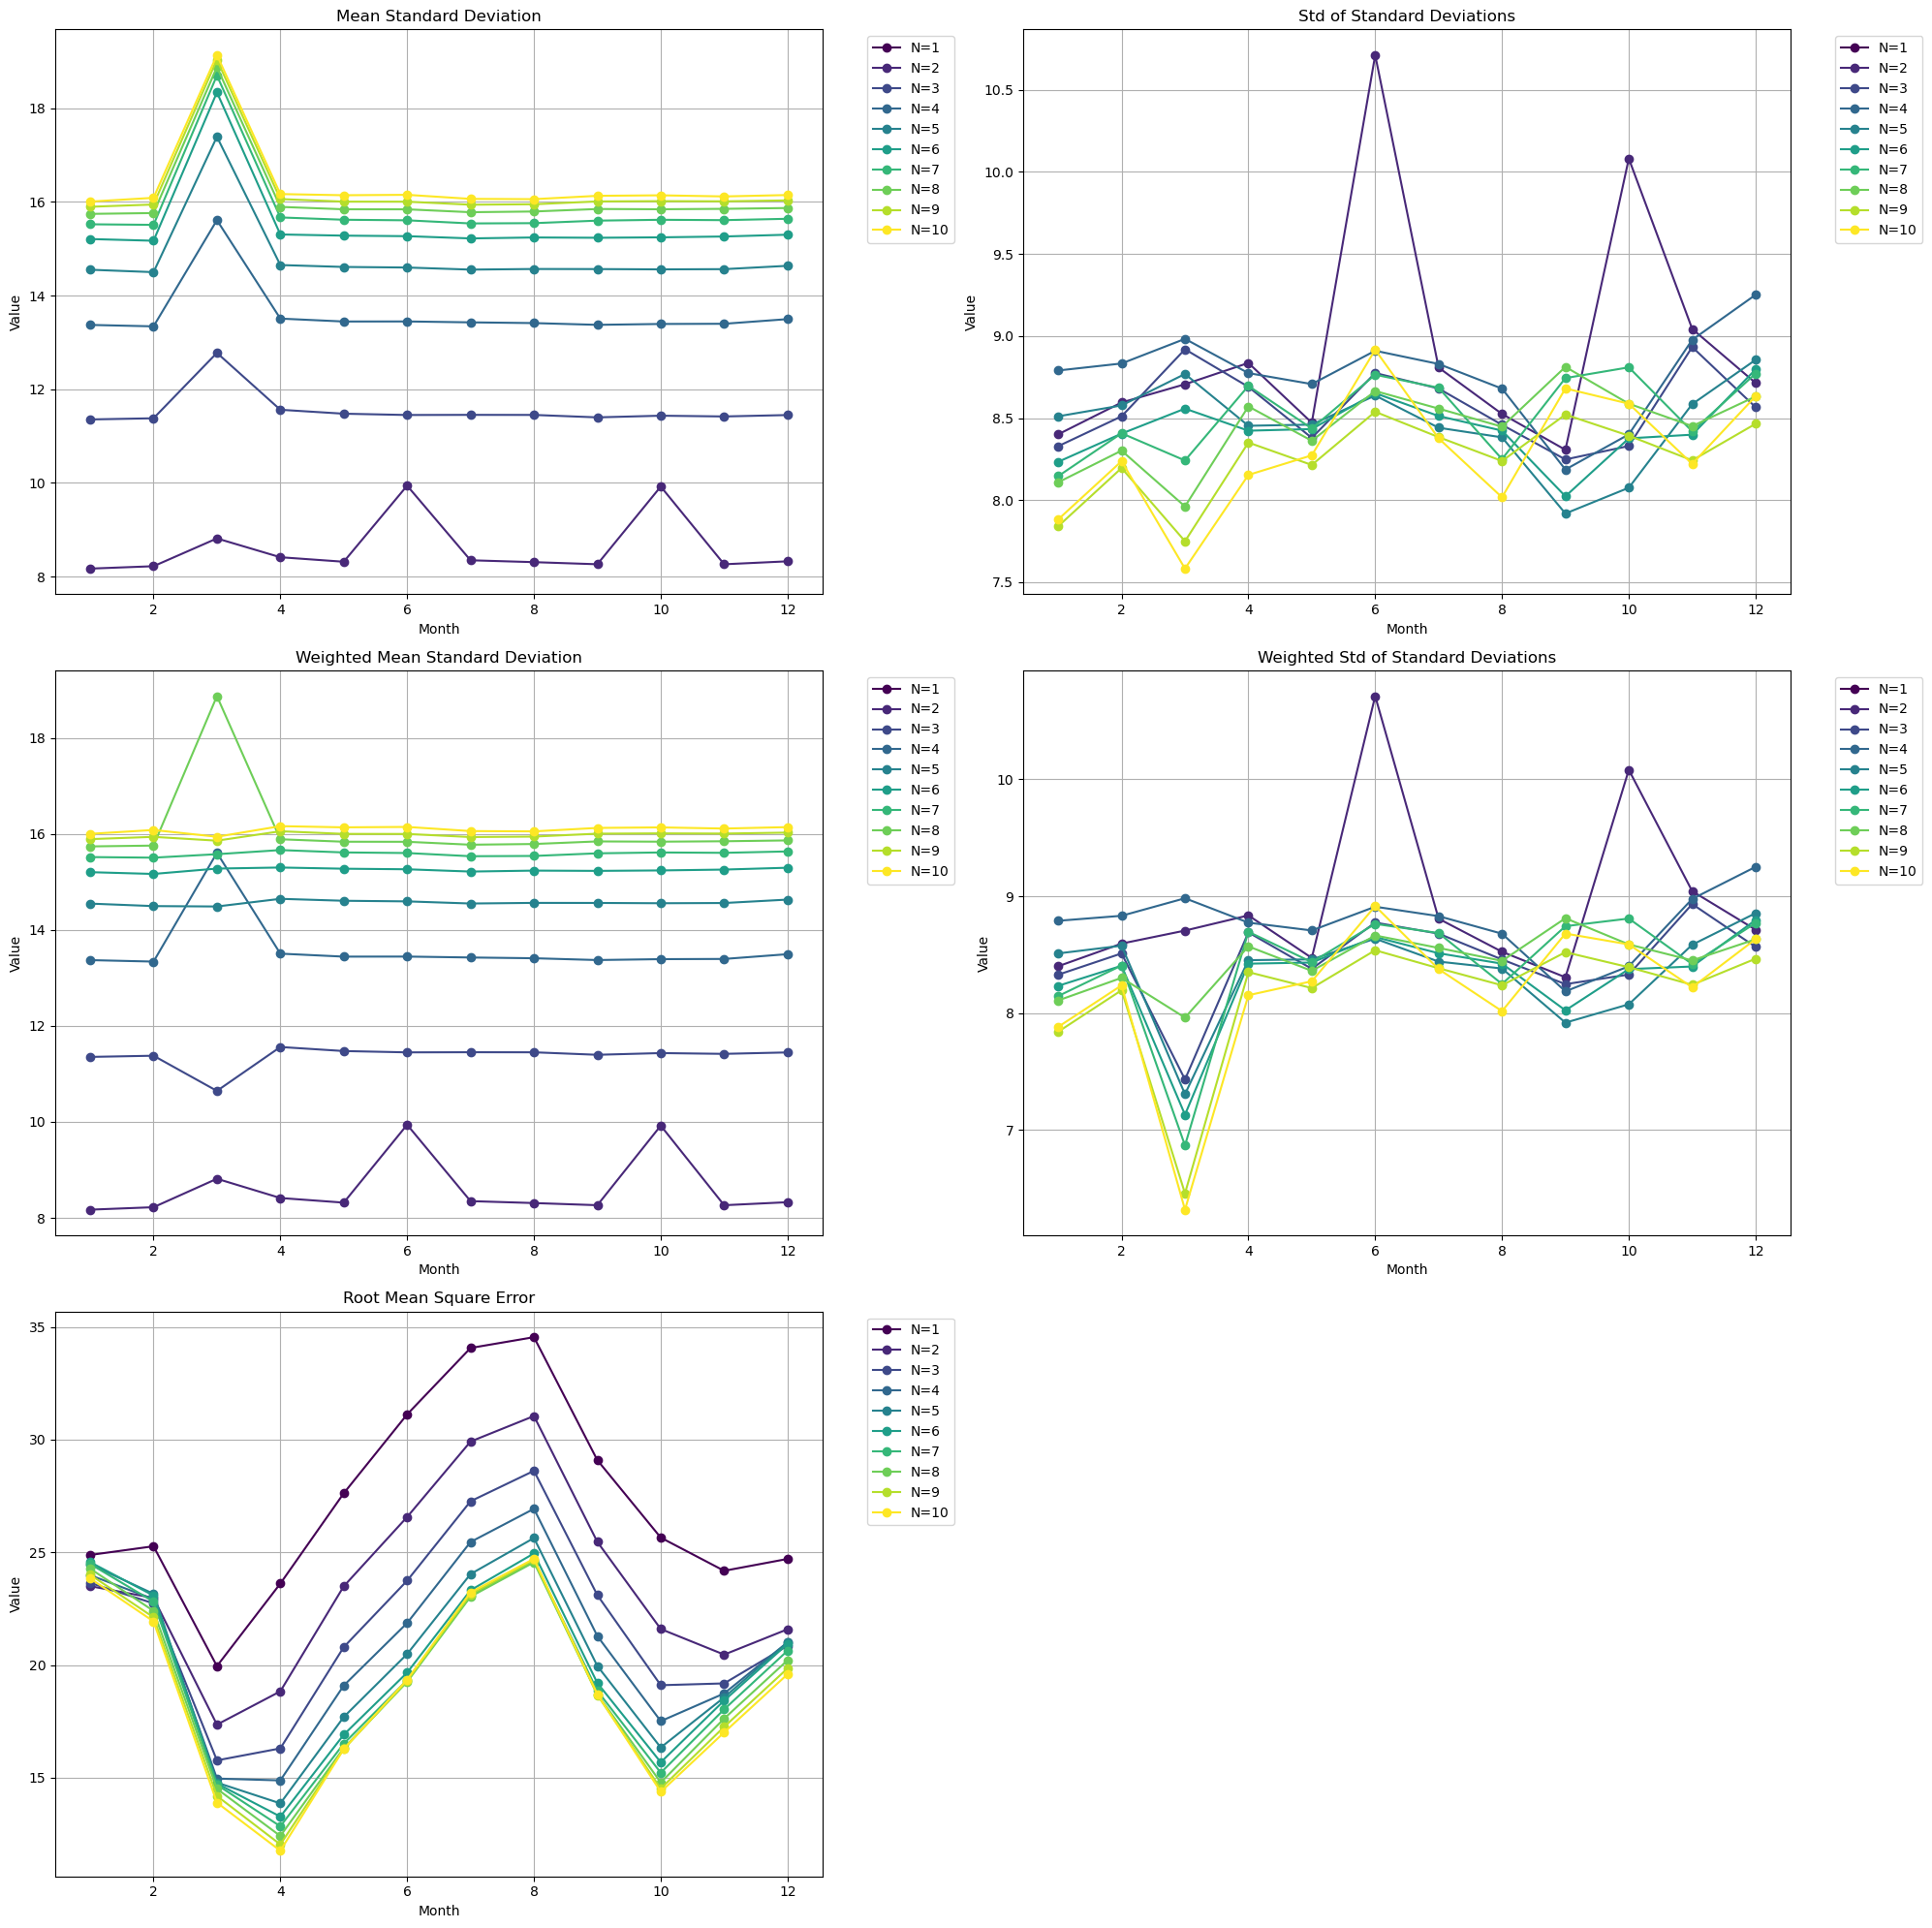


Optimal N values by month:

Month 1:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1
rmse: N = 2

Month 2:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1
rmse: N = 10

Month 3:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1
rmse: N = 10

Month 4:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1
rmse: N = 10

Month 5:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1
rmse: N = 9

Month 6:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1
rmse: N = 8

Month 7:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1
rmse: N = 8

Month 8:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1
rmse: N = 8

Month 9:
mean_std: N = 1
std_of_std: N = 1
weighted_mean_std: N = 1
weighted_std_of_std: N = 1
rmse: N =

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from scipy.spatial.distance import euclidean
import datetime

class CustomKNNRegressor(KNeighborsRegressor):
    def get_neighbor_values(self, X):
        """Get the target values of neighbors for each prediction point"""
        dist, indices = self.kneighbors(X)
        return self._y[indices], dist

# Create a copy of the original DataFrame
data_copy = data.copy()

# Convert temperature columns from Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

temperature_columns = ['tavg', 'tmin', 'tmax']
for col in temperature_columns:
    data_copy[col] = data_copy[col].apply(celsius_to_fahrenheit)

# Convert time column to datetime if it's not already
data_copy['time'] = pd.to_datetime(data_copy['time'])
data_copy['month'] = data_copy['time'].dt.month

# Columns to use as features
feature_columns = ['latitude', 'longitude']

# Columns to analyze
columns_to_analyze = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'elevation']

# Drop rows with NaNs in any of the analyzed columns for fitting purposes
non_missing_data = data_copy.dropna(subset=columns_to_analyze + feature_columns)

# Separate features
X_non_missing = non_missing_data[feature_columns]

# Dictionary to store results for each N
results = {}

# Number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Function to calculate distance-weighted standard deviation
def weighted_std(values, distances):
    weights = 1 / (distances + 1e-6)
    weights = weights / np.sum(weights)
    weighted_mean = np.sum(values * weights)
    weighted_var = np.sum(weights * (values - weighted_mean) ** 2)
    return np.sqrt(weighted_var)

# Iterate over N from 1 to 10
for N in range(1, 11):
    print(f"\nAnalyzing N = {N}")
    
    # Dictionary to store metrics for each column and month
    monthly_metrics = {
        month: {
            col: {
                'neighbor_stds': [],
                'weighted_neighbor_stds': [],
                'predictions': [],
                'actual_values': []
            } for col in columns_to_analyze
        } for month in range(1, 13)
    }
    
    for column in columns_to_analyze:
        print(f"\nProcessing column: {column}")
        y_non_missing = non_missing_data[column]
        
        # Skip columns with all NaN values
        if y_non_missing.isna().all():
            continue
            
        # Perform k-fold cross-validation
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_non_missing)):
            X_train, X_val = X_non_missing.iloc[train_idx], X_non_missing.iloc[val_idx]
            y_train, y_val = y_non_missing.iloc[train_idx], y_non_missing.iloc[val_idx]
            
            # Get months for validation set
            val_months = non_missing_data['month'].iloc[val_idx]
            
            # Train the custom KNN model
            knn_model = CustomKNNRegressor(n_neighbors=N, weights='distance')
            knn_model.fit(X_train, y_train)
            
            # Get neighbor values and distances for each prediction point
            neighbor_values, distances = knn_model.get_neighbor_values(X_val)
            predictions = knn_model.predict(X_val)
            
            # Calculate standard deviation of neighbors for each prediction point
            point_stds = np.std(neighbor_values, axis=1)
            weighted_point_stds = np.array([
                weighted_std(values, dists) 
                for values, dists in zip(neighbor_values, distances)
            ])
            
            # Store results by month
            for month in range(1, 13):
                month_mask = val_months == month
                if np.any(month_mask):
                    monthly_metrics[month][column]['neighbor_stds'].extend(point_stds[month_mask])
                    monthly_metrics[month][column]['weighted_neighbor_stds'].extend(weighted_point_stds[month_mask])
                    monthly_metrics[month][column]['predictions'].extend(predictions[month_mask])
                    monthly_metrics[month][column]['actual_values'].extend(y_val[month_mask])
    
    # Calculate monthly summary statistics
    monthly_summary = {}
    overall_stats = {
        'mean_std': [],
        'std_of_std': [],
        'weighted_mean_std': [],
        'weighted_std_of_std': [],
        'rmse': []
    }
    
    for month in range(1, 13):
        monthly_summary[month] = {
            'mean_std': {},
            'std_of_std': {},
            'weighted_mean_std': {},
            'weighted_std_of_std': {},
            'rmse': {}
        }
        
        for column in columns_to_analyze:
            if monthly_metrics[month][column]['neighbor_stds']:
                # Regular statistics
                neighbor_stds = np.array(monthly_metrics[month][column]['neighbor_stds'])
                monthly_summary[month]['mean_std'][column] = np.mean(neighbor_stds)
                monthly_summary[month]['std_of_std'][column] = np.std(neighbor_stds)
                
                # Distance-weighted statistics
                weighted_stds = np.array(monthly_metrics[month][column]['weighted_neighbor_stds'])
                monthly_summary[month]['weighted_mean_std'][column] = np.mean(weighted_stds)
                monthly_summary[month]['weighted_std_of_std'][column] = np.std(weighted_stds)
                
                # Calculate RMSE
                predictions = np.array(monthly_metrics[month][column]['predictions'])
                actuals = np.array(monthly_metrics[month][column]['actual_values'])
                rmse = np.sqrt(np.mean((predictions - actuals) ** 2))
                monthly_summary[month]['rmse'][column] = rmse
        
        # Calculate overall monthly statistics
        if monthly_summary[month]['mean_std']:
            overall_stats['mean_std'].append(np.mean(list(monthly_summary[month]['mean_std'].values())))
            overall_stats['std_of_std'].append(np.mean(list(monthly_summary[month]['std_of_std'].values())))
            overall_stats['weighted_mean_std'].append(np.mean(list(monthly_summary[month]['weighted_mean_std'].values())))
            overall_stats['weighted_std_of_std'].append(np.mean(list(monthly_summary[month]['weighted_std_of_std'].values())))
            overall_stats['rmse'].append(np.mean(list(monthly_summary[month]['rmse'].values())))
    
    # Store results for this N value
    results[N] = {
        'monthly_summary': monthly_summary,
        'overall_mean_std': np.mean(overall_stats['mean_std']),
        'overall_std_of_std': np.mean(overall_stats['std_of_std']),
        'overall_weighted_mean_std': np.mean(overall_stats['weighted_mean_std']),
        'overall_weighted_std_of_std': np.mean(overall_stats['weighted_std_of_std']),
        'overall_rmse': np.mean(overall_stats['rmse'])
    }
    
    # Print monthly results
    print(f"\nDetailed Monthly Results for N = {N}")
    for month in range(1, 13):
        print(f"\nMonth {month}:")
        if monthly_summary[month]['mean_std']:
            print("\nRegular Statistics:")
            for column in columns_to_analyze:
                if column in monthly_summary[month]['mean_std']:
                    print(f"\n{column}:")
                    print(f"  Mean Std: {monthly_summary[month]['mean_std'][column]:.4f}")
                    print(f"  Std of Std: {monthly_summary[month]['std_of_std'][column]:.4f}")
                    print(f"  RMSE: {monthly_summary[month]['rmse'][column]:.4f}")
            
            print("\nDistance-Weighted Statistics:")
            for column in columns_to_analyze:
                if column in monthly_summary[month]['weighted_mean_std']:
                    print(f"\n{column}:")
                    print(f"  Weighted Mean Std: {monthly_summary[month]['weighted_mean_std'][column]:.4f}")
                    print(f"  Weighted Std of Std: {monthly_summary[month]['weighted_std_of_std'][column]:.4f}")

# Create visualizations
import matplotlib.pyplot as plt

# Create monthly trend visualization with RMSE
plt.figure(figsize=(20, 20))

# Create subplots for each metric
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
metrics = ['mean_std', 'std_of_std', 'weighted_mean_std', 'weighted_std_of_std', 'rmse']
titles = ['Mean Standard Deviation', 'Std of Standard Deviations', 
          'Weighted Mean Standard Deviation', 'Weighted Std of Standard Deviations', 'Root Mean Square Error']
colors = plt.cm.viridis(np.linspace(0, 1, 10))

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    for N in range(1, 11):
        monthly_values = []
        for month in range(1, 13):
            if metric == 'rmse':
                values = [v for v in results[N]['monthly_summary'][month][metric].values() if v]
            else:
                values = [v for v in results[N]['monthly_summary'][month][metric].values() if v]
            monthly_values.append(np.mean(values) if values else np.nan)
        
        ax.plot(range(1, 13), monthly_values, 'o-', label=f'N={N}', color=colors[N-1])
    
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove the empty subplot
axes[-1, -1].remove()

plt.tight_layout()
plt.show()

# Find optimal N values for each month and metric
monthly_optimal_N = {month: {} for month in range(1, 13)}
metrics = ['mean_std', 'std_of_std', 'weighted_mean_std', 'weighted_std_of_std', 'rmse']

for month in range(1, 13):
    for metric in metrics:
        valid_N = []
        metric_values = []
        
        for N in results.keys():
            if metric in results[N]['monthly_summary'][month] and results[N]['monthly_summary'][month][metric]:
                valid_N.append(N)
                metric_values.append(np.mean(list(results[N]['monthly_summary'][month][metric].values())))
        
        if valid_N:
            monthly_optimal_N[month][metric] = valid_N[np.argmin(metric_values)]

print("\nOptimal N values by month:")
for month in range(1, 13):
    print(f"\nMonth {month}:")
    for metric in metrics:
        if metric in monthly_optimal_N[month]:
            print(f"{metric}: N = {monthly_optimal_N[month][metric]}")


Analyzing N = 1

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 2

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 3

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 4

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 5

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 6

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wsp

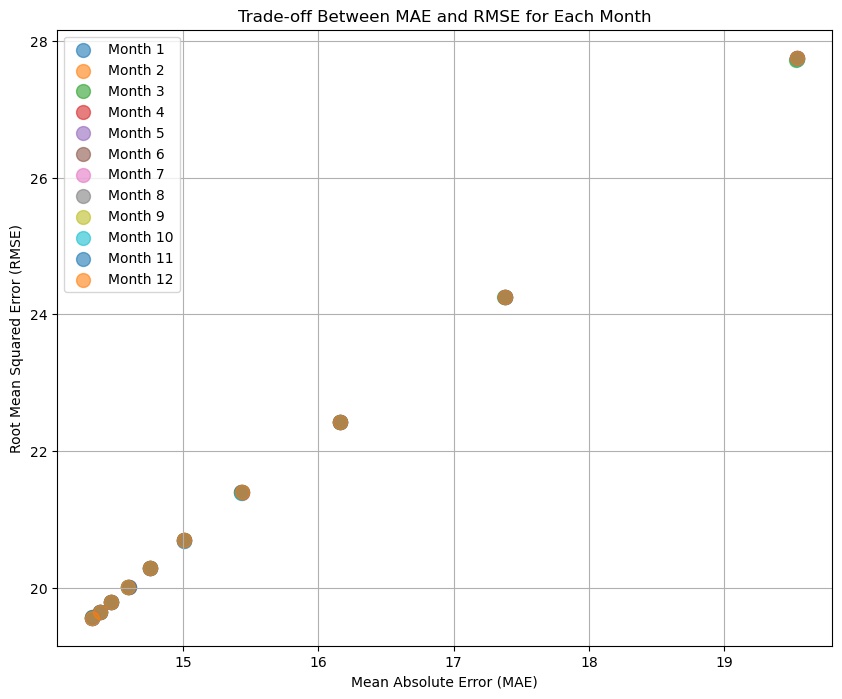


Optimal N values by month (based on RMSE):
Month 1: N = 10
Month 2: N = 10
Month 3: N = 10
Month 4: N = 10
Month 5: N = 10
Month 6: N = 10
Month 7: N = 10
Month 8: N = 10
Month 9: N = 10
Month 10: N = 10
Month 11: N = 10
Month 12: N = 10


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

class CustomKNNRegressor(KNeighborsRegressor):
    def get_neighbor_values(self, X):
        """Get the target values of neighbors for each prediction point"""
        dist, indices = self.kneighbors(X)
        return self._y[indices], dist

# Create a copy of the original DataFrame
data_copy = data.copy()

# Convert temperature columns from Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

temperature_columns = ['tavg', 'tmin', 'tmax']
for col in temperature_columns:
    data_copy[col] = data_copy[col].apply(celsius_to_fahrenheit)

# Convert time column to datetime if it's not already
data_copy['time'] = pd.to_datetime(data_copy['time'])
data_copy['month'] = data_copy['time'].dt.month

# Columns to use as features
feature_columns = ['latitude', 'longitude']

# Columns to analyze
columns_to_analyze = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'elevation']

# Drop rows with NaNs in any of the analyzed columns for fitting purposes
non_missing_data = data_copy.dropna(subset=columns_to_analyze + feature_columns)

# Separate features
X_non_missing = non_missing_data[feature_columns]

# Dictionary to store results for each N
results = {}

# Number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Iterate over N from 1 to 10
for N in range(1, 11):
    print(f"\nAnalyzing N = {N}")
    
    # Dictionary to store metrics for each column and month
    monthly_metrics = {
        month: {
            col: {
                'mae': [],
                'rmse': [],
                'predictions': [],
                'actual_values': []
            } for col in columns_to_analyze
        } for month in range(1, 13)
    }
    
    for column in columns_to_analyze:
        print(f"\nProcessing column: {column}")
        y_non_missing = non_missing_data[column]
        
        # Skip columns with all NaN values
        if y_non_missing.isna().all():
            continue
            
        # Perform k-fold cross-validation
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_non_missing)):
            X_train, X_val = X_non_missing.iloc[train_idx], X_non_missing.iloc[val_idx]
            y_train, y_val = y_non_missing.iloc[train_idx], y_non_missing.iloc[val_idx]
            
            # Get months for validation set
            val_months = non_missing_data['month'].iloc[val_idx]
            
            # Train the custom KNN model
            knn_model = CustomKNNRegressor(n_neighbors=N, weights='distance')
            knn_model.fit(X_train, y_train)
            
            # Get predictions
            predictions = knn_model.predict(X_val)
            
            # Calculate MAE and RMSE
            mae = mean_absolute_error(y_val, predictions)
            rmse = np.sqrt(mean_squared_error(y_val, predictions))
            
            # Store results by month
            for month in range(1, 13):
                month_mask = val_months == month
                if np.any(month_mask):
                    monthly_metrics[month][column]['mae'].extend([mae] * np.sum(month_mask))
                    monthly_metrics[month][column]['rmse'].extend([rmse] * np.sum(month_mask))
                    monthly_metrics[month][column]['predictions'].extend(predictions[month_mask])
                    monthly_metrics[month][column]['actual_values'].extend(y_val[month_mask])
    
    # Calculate monthly summary statistics for MAE and RMSE
    monthly_summary = {}
    
    for month in range(1, 13):
        monthly_summary[month] = {
            'mae': {},
            'rmse': {}
        }
        
        for column in columns_to_analyze:
            if monthly_metrics[month][column]['mae']:
                # Calculate MAE and RMSE
                mae_values = np.array(monthly_metrics[month][column]['mae'])
                rmse_values = np.array(monthly_metrics[month][column]['rmse'])
                
                monthly_summary[month]['mae'][column] = np.mean(mae_values)
                monthly_summary[month]['rmse'][column] = np.mean(rmse_values)
    
    # Store results for this N value
    results[N] = {
        'monthly_summary': monthly_summary
    }

# Plot trade-off between MAE and RMSE

plt.figure(figsize=(10, 8))

# Loop through each month and plot MAE vs RMSE for each N
for month in range(1, 13):
    mae_values = []
    rmse_values = []
    
    for N in range(1, 11):
        mae = np.mean([v for v in results[N]['monthly_summary'][month]['mae'].values() if v])
        rmse = np.mean([v for v in results[N]['monthly_summary'][month]['rmse'].values() if v])
        
        mae_values.append(mae)
        rmse_values.append(rmse)
    
    # Scatter plot for MAE vs RMSE for the current month
    plt.scatter(mae_values, rmse_values, label=f"Month {month}", s=100, alpha=0.6)

plt.title("Trade-off Between MAE and RMSE for Each Month")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend()
plt.grid(True)
plt.show()

# Find optimal N values for each month based on RMSE
monthly_optimal_N = {month: {} for month in range(1, 13)}

for month in range(1, 13):
    rmse_values = []
    for N in results.keys():
        rmse = np.mean(list(results[N]['monthly_summary'][month]['rmse'].values()))
        rmse_values.append(rmse)
    
    optimal_N = np.argmin(rmse_values) + 1
    monthly_optimal_N[month]['rmse'] = optimal_N

print("\nOptimal N values by month (based on RMSE):")
for month in range(1, 13):
    print(f"Month {month}: N = {monthly_optimal_N[month]['rmse']}")


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

class CustomKNNRegressor(KNeighborsRegressor):
    def get_neighbor_values(self, X):
        """Get the target values of neighbors for each prediction point"""
        dist, indices = self.kneighbors(X)
        return self._y[indices], dist

# Create a copy of the original DataFrame
data_copy = data.copy()

# Convert temperature columns from Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

temperature_columns = ['tavg', 'tmin', 'tmax']
for col in temperature_columns:
    data_copy[col] = data_copy[col].apply(celsius_to_fahrenheit)

# Convert time column to datetime if it's not already
data_copy['time'] = pd.to_datetime(data_copy['time'])

# Convert 'time' to number of seconds since epoch
data_copy['time_seconds'] = (data_copy['time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Use this single feature for time
feature_columns = ['latitude', 'longitude', 'time_seconds']

# Columns to analyze (temperature, precipitation, etc.)
columns_to_analyze = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'elevation']

# Drop rows with NaNs in any of the analyzed columns for fitting purposes
non_missing_data = data_copy.dropna(subset=columns_to_analyze + feature_columns)

# Separate features
X_non_missing = non_missing_data[feature_columns]

# Dictionary to store results for each N
mae_results = {}
rmse_results = {}

# Iterate over N from 1 to 10 to compute MAE and RMSE
for N in range(1, 101):
    print(f"\nAnalyzing N = {N}")
    
    # Initialize lists to store MAE and RMSE values for each fold
    maes = []
    rmses = []
    
    # Loop over each column to analyze (target variable)
    for column in columns_to_analyze:
        print(f"\nProcessing column: {column}")
        y_non_missing = non_missing_data[column]
        
        # Skip columns with all NaN values
        if y_non_missing.isna().all():
            continue
        
        # Train the custom KNN model with time included as a feature
        knn_model = CustomKNNRegressor(n_neighbors=N, weights='distance')
        knn_model.fit(X_non_missing, y_non_missing)
        
        # Get predictions by finding nearest neighbors based on the exact timestamps
        predictions = knn_model.predict(X_non_missing)
        
        # Calculate MAE and RMSE
        mae = mean_absolute_error(y_non_missing, predictions)
        rmse = np.sqrt(mean_squared_error(y_non_missing, predictions))
        
        # Store MAE and RMSE for the current column
        maes.append(mae)
        rmses.append(rmse)
    
    # Calculate the average MAE and RMSE for the current N value
    mae_results[N] = np.mean(maes)
    rmse_results[N] = np.mean(rmses)

# Plot the elbow curves for MAE and RMSE
plt.figure(figsize=(14, 6))

# Subplot for MAE
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), list(mae_results.values()), marker='o', linestyle='-', color='b')
plt.title("Elbow Curve for MAE")
plt.xlabel("Number of Neighbors (N)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)

# Subplot for RMSE
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), list(rmse_results.values()), marker='o', linestyle='-', color='r')
plt.title("Elbow Curve for RMSE")
plt.xlabel("Number of Neighbors (N)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.grid(True)

plt.tight_layout()
plt.show()



Analyzing N = 1

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 2

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 3

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 4

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 5

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 6

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wsp

KeyboardInterrupt: 


Analyzing N = 1

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 2

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 3

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 4

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 5

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wspd

Processing column: elevation

Analyzing N = 6

Processing column: tavg

Processing column: tmin

Processing column: tmax

Processing column: prcp

Processing column: wsp

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

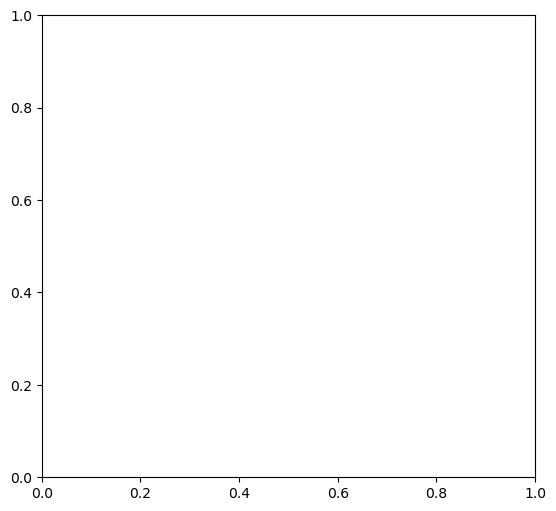

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

class CustomKNNRegressor(KNeighborsRegressor):
    def get_neighbor_values(self, X):
        """Get the target values of neighbors for each prediction point"""
        dist, indices = self.kneighbors(X)
        return self._y[indices], dist

# Create a copy of the original DataFrame
data_copy = data.copy()

# Convert temperature columns from Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

temperature_columns = ['tavg', 'tmin', 'tmax']
for col in temperature_columns:
    data_copy[col] = data_copy[col].apply(celsius_to_fahrenheit)

# Convert time column to datetime if it's not already
data_copy['time'] = pd.to_datetime(data_copy['time'])

# Convert 'time' to number of seconds since epoch
data_copy['time_seconds'] = (data_copy['time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Columns to use as features
feature_columns = ['latitude', 'longitude', 'time_seconds']

# Columns to analyze (temperature, precipitation, etc.)
columns_to_analyze = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'elevation']

# Drop rows with NaNs in any of the analyzed columns for fitting purposes
non_missing_data = data_copy.dropna(subset=columns_to_analyze + feature_columns)

# Separate features
X_non_missing = non_missing_data[feature_columns]

# Dictionary to store results for each N
mae_results = {}
rmse_results = {}

# Iterate over N from 1 to 10 to compute MAE and RMSE
for N in range(1, 101):
    print(f"\nAnalyzing N = {N}")
    
    # Initialize lists to store MAE and RMSE values for each fold
    maes = []
    rmses = []
    
    # Loop over each column to analyze (target variable)
    for column in columns_to_analyze:
        print(f"\nProcessing column: {column}")
        y_non_missing = non_missing_data[column]
        
        # Skip columns with all NaN values
        if y_non_missing.isna().all():
            continue
        
        # Train the custom KNN model with time included as a feature
        knn_model = CustomKNNRegressor(n_neighbors=N, weights='distance')
        knn_model.fit(X_non_missing, y_non_missing)
        
        # Now ensure predictions are only made using points with the same timestamp
        # Group the data by 'time_seconds' and avoid refitting the model repeatedly
        predictions = []
        for timestamp, group in non_missing_data.groupby('time_seconds'):
            # Extract the subset of data corresponding to the current timestamp
            X_group = group[feature_columns]
            y_group = group[column]
            
            # Fit the model on this subset
            knn_model.fit(X_group, y_group)
            
            # Make predictions for the same group
            X_group_for_pred = X_group[feature_columns]  # Features for prediction
            preds = knn_model.predict(X_group_for_pred)
            
            predictions.extend(preds)
        
        # Convert predictions to numpy array
        predictions = np.array(predictions)
        
        # Calculate MAE and RMSE for this column, excluding NaN predictions
        valid_predictions = predictions[~np.isnan(predictions)]  # Filter out NaN predictions
        valid_actuals = y_non_missing[~np.isnan(predictions)]     # Ensure corresponding actuals are kept

        mae = mean_absolute_error(valid_actuals, valid_predictions)
        rmse = np.sqrt(mean_squared_error(valid_actuals, valid_predictions))
        
        # Store MAE and RMSE for the current column
        maes.append(mae)
        rmses.append(rmse)
    
    # Calculate the average MAE and RMSE for the current N value
    mae_results[N] = np.mean(maes)
    rmse_results[N] = np.mean(rmses)

# Plot the elbow curves for MAE and RMSE
plt.figure(figsize=(14, 6))

# Subplot for MAE
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), list(mae_results.values()), marker='o', linestyle='-', color='b')
plt.title("Elbow Curve for MAE")
plt.xlabel("Number of Neighbors (N)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)

# Subplot for RMSE
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), list(rmse_results.values()), marker='o', linestyle='-', color='r')
plt.title("Elbow Curve for RMSE")
plt.xlabel("Number of Neighbors (N)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.grid(True)

plt.tight_layout()
plt.show()


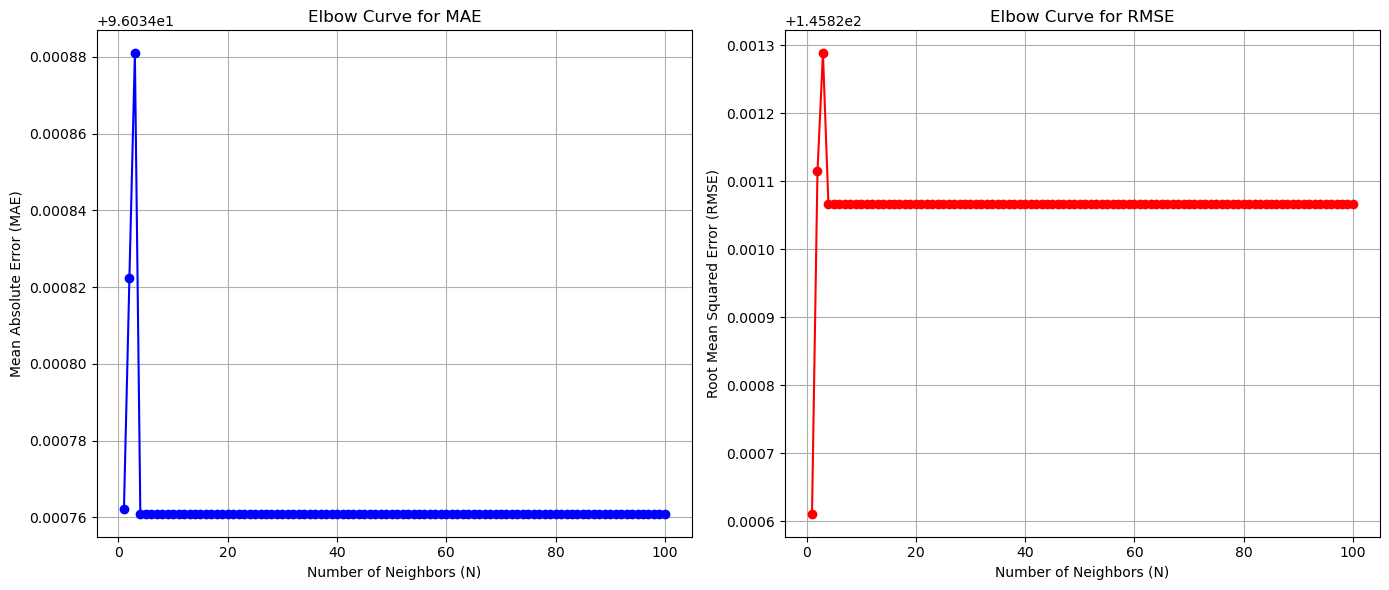

In [11]:
plt.figure(figsize=(14, 6))

# Subplot for MAE
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), list(mae_results.values()), marker='o', linestyle='-', color='b')
plt.title("Elbow Curve for MAE")
plt.xlabel("Number of Neighbors (N)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)

# Subplot for RMSE
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), list(rmse_results.values()), marker='o', linestyle='-', color='r')
plt.title("Elbow Curve for RMSE")
plt.xlabel("Number of Neighbors (N)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.grid(True)

plt.tight_layout()
plt.show()